# __Image Classification with CIFAR10__

Build a neural network-based classification model to recognize characters using the following metrics:

- Use four convolution layers with a 3X3 kernel and activation function as ReLU.
- Add two convolutional layers followed by two max pooling layers.


## Steps to be followed:

1. Import the necessary libraries
2. Load and normalize the CIFAR10 training and test datasets using TensorFlow
3. Display a batch of training images
4. Define the convolutional neural network
5. Compile the Model
6. Train the network on the training data with validation split
7. Test the network on the test data
8. Predict a batch of test images
9. Perform Classes on Individual Datasets

### Step 1: Import the necessary libraries


In [1]:
#!pip install tensorflow==2.17.0 scikeras==0.13.0 keras==3.2.0

In [1]:
import os

# Disable oneDNN optimizations to avoid potential minor numerical differences caused by floating-point round-off errors.
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Load and normalize the CIFAR10 training and test datasets using TensorFlow


In [3]:
# Load the CIFAR10 training and test datasets using TensorFlow
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = tf.keras.datasets.cifar10.load_data()

# Compute mean and std from the training data
mean = np.mean(train_images_raw, axis=(0, 1, 2))
std = np.std(train_images_raw, axis=(0, 1, 2))

# Normalize the datasets
train_images_nm = (train_images_raw - mean) / std
test_images_nm = (test_images_raw - mean) / std

# Define class names
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 52s 0us/step


### Step 3: Display a batch of training images

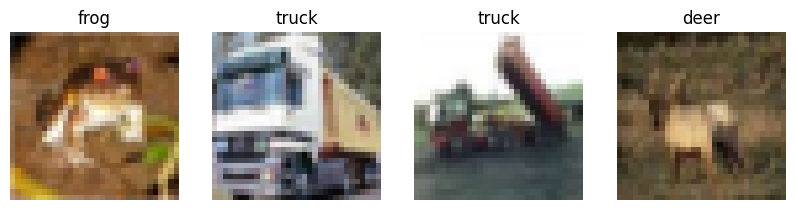

In [4]:
# Display a batch of training images
def imshow(img):
    img = img * std + mean
    plt.imshow(img.astype('uint8'))
    plt.axis('off')

def show_batch(images, labels):
    fig, axes = plt.subplots(1, 4, figsize=(10, 10))
    for i in range(4):
        ax = axes[i]
        ax.imshow((images[i] * std + mean).astype('uint8'))
        ax.set_title(class_names[labels[i][0]])
        ax.axis('off')
    plt.show()

# Display first batch of training images
show_batch(train_images_nm[:4], train_labels_raw[:4])

**Observations:**



- The output will show an image containing four different objects: two truck, a frog, and a deer.
- This code is useful for visualizing a batch of images and their corresponding labels from a dataset.

### Step 4: Define the convolutional neural network

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(6, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\prate\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Step 5: Compile the Model

In [6]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Step 6: Train the network on the training data with validation split





In [7]:
history = model.fit(train_images_nm, train_labels_raw, epochs=2, batch_size=4, validation_split=0.2)


Epoch 1/2
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.3465 - loss: 1.7754 - val_accuracy: 0.4856 - val_loss: 1.4252
Epoch 2/2
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.5207 - loss: 1.3407 - val_accuracy: 0.5337 - val_loss: 1.3434


### **Observation:**

- The training loss decreased from 1.57 to 1.29 from the first to the second epoch. This indicates that the model is learning and improving its predictions on the training data.
- The training accuracy increased from 43% to 54% over the two epochs, which is a positive sign showing that the model's performance is improving on the training set.

### Step 7: Test the network on the test data




In [8]:
test_loss, test_acc = model.evaluate(test_images_nm, test_labels_raw, verbose=2)
print(f'Accuracy of the network on the 10000 test images: {test_acc * 100:.2f} %')

313/313 - 1s - 5ms/step - accuracy: 0.5295 - loss: 1.3436
Accuracy of the network on the 10000 test images: 52.95 %


### **Observation:**

- The test accuracy (54%) is consistent with the training accuracy (55%) and validation accuracy (55%). This consistency suggests that the model is generalizing well and is not overfitting to the training data.

### Step 8: Predict a batch of test images

In [9]:
predictions = model.predict(test_images_nm[:4])
predicted_labels = np.argmax(predictions, axis=1)

print('GroundTruth:', ' '.join('%5s' % class_names[test_labels_raw[i][0]] for i in range(4)))
print('Predicted:  ', ' '.join('%5s' % class_names[predicted_labels[i]] for i in range(4)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
GroundTruth:   cat  ship  ship plane
Predicted:     cat   car  ship plane


**Observation:**

- The model correctly predicted the labels for all four images in the batch.
- The predictions match the ground truth labels exactly: cat, ship, ship, and plane.

### Step 9: Perform Classes on Individual Datasets


In [10]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

predictions = model.predict(test_images_nm)
predicted_labels = np.argmax(predictions, axis=1)

for i in range(len(test_labels_raw)):
    label = test_labels_raw[i][0]
    class_correct[label] += (predicted_labels[i] == label)
    class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        class_names[i], 100 * class_correct[i] / class_total[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy of plane : 67 %
Accuracy of   car : 63 %
Accuracy of  bird : 30 %
Accuracy of   cat : 40 %
Accuracy of  deer : 45 %
Accuracy of   dog : 41 %
Accuracy of  frog : 80 %
Accuracy of horse : 57 %
Accuracy of  ship : 48 %
Accuracy of truck : 53 %


### **Observations:**
- The variability in accuracy across different classes suggests that the model finds some classes easier to distinguish than others.
- Classes like 'car' and 'frog' might have more distinct features that the model can easily learn.
- Classes like 'bird' and 'cat' might be more complex or have more variation within the class, making them harder to classify.

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 6)      │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,304 (317.60 KB)

 Trainable params: 81,302 (317.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)